In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/cluster_two_blobs.csv")

In [3]:
df_outliers = pd.read_csv("/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/cluster_two_blobs_outliers.csv")

<AxesSubplot:xlabel='X1', ylabel='X2'>

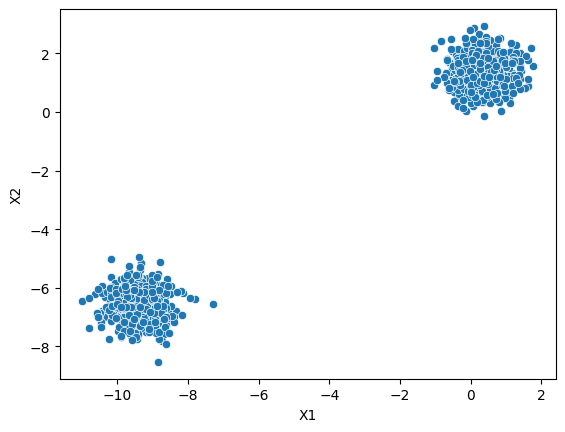

In [5]:
sns.scatterplot(df,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

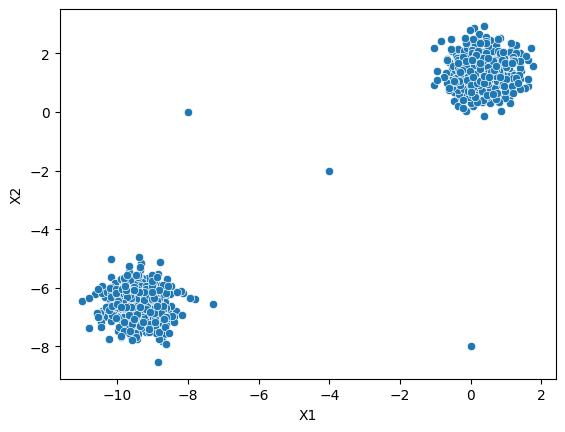

In [6]:
sns.scatterplot(df_outliers,x='X1',y='X2')

In [20]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    plt.figure(dpi=200)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1',alpha=1)

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
model = DBSCAN()

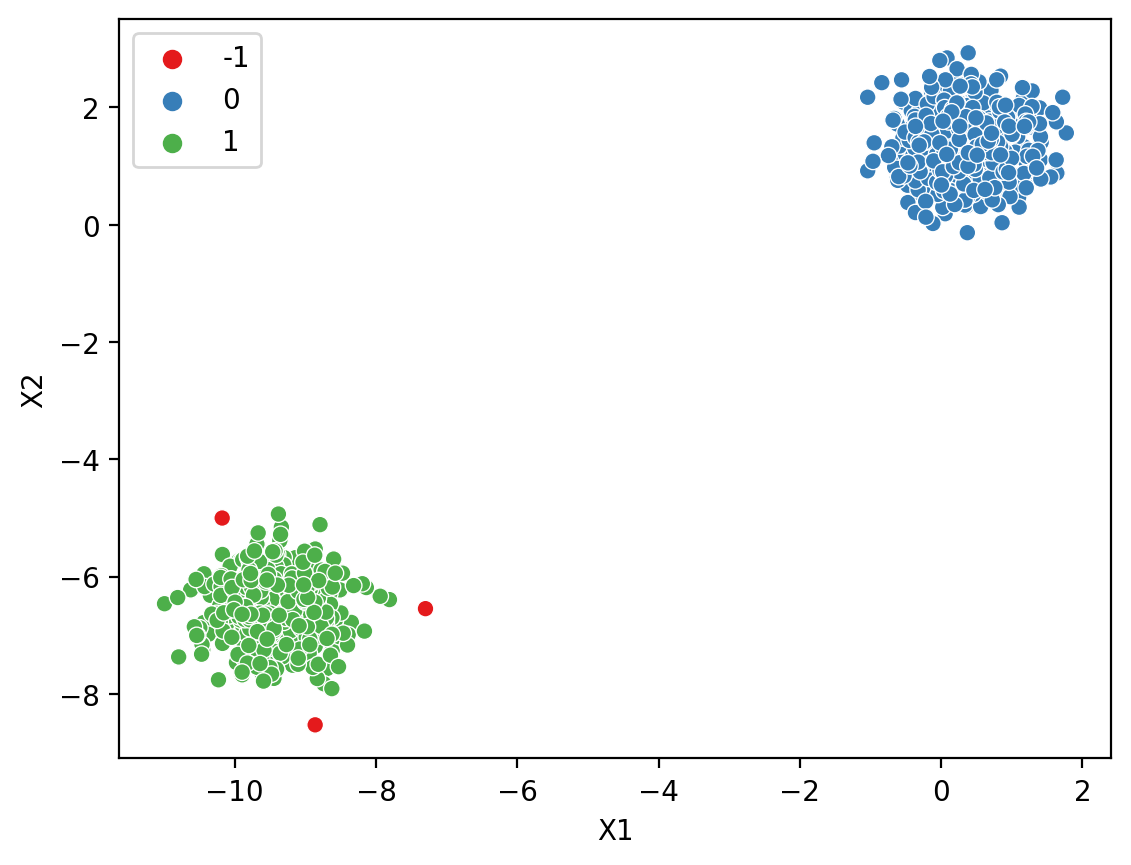

In [23]:
display_categories(model,df)

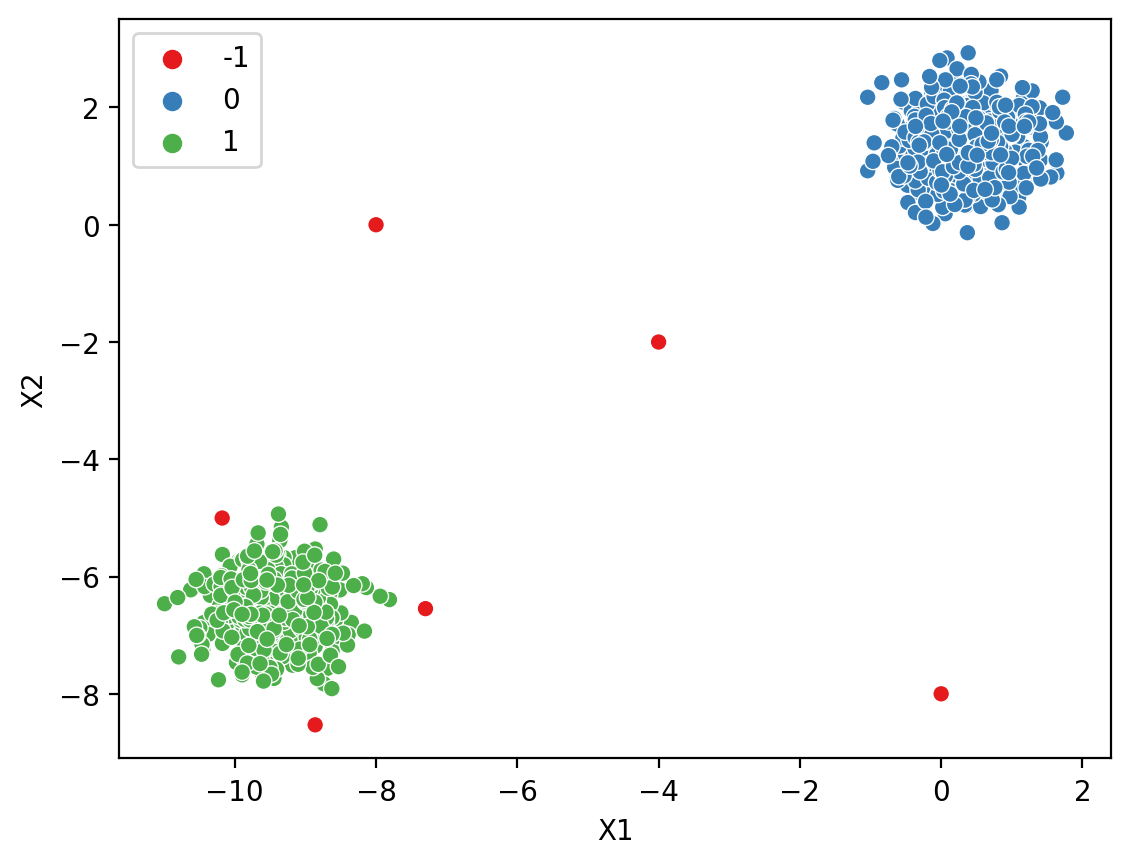

In [24]:
display_categories(model,df_outliers)

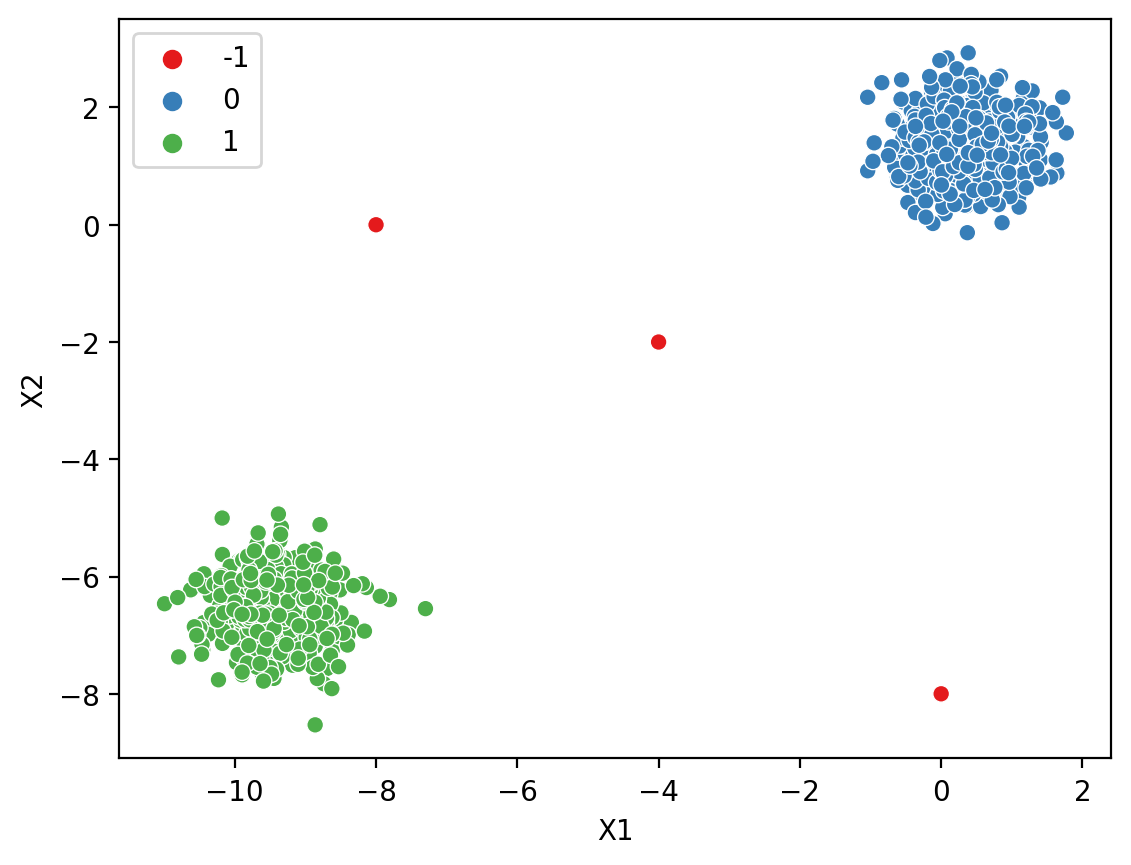

In [25]:
model = DBSCAN(eps=1)
display_categories(model,df_outliers)

In [27]:
np.sum(model.labels_==-1)

3

In [29]:
#Percent of points classified as outliers
100*np.sum(model.labels_==-1)/len(model.labels_)

0.29910269192422734

In [30]:
len(model.labels_)

1003

In [35]:
outlier_percent = []
no_of_outliers = []
for eps in np.linspace(0.001,7,200):
    model = DBSCAN(eps=eps)
    model.fit(df_outliers)
    no_of_outliers.append(np.sum(model.labels_==-1))
    percent = 100*np.sum(model.labels_==-1)/len(model.labels_)
    outlier_percent.append(percent)

(0.0, 2.0)

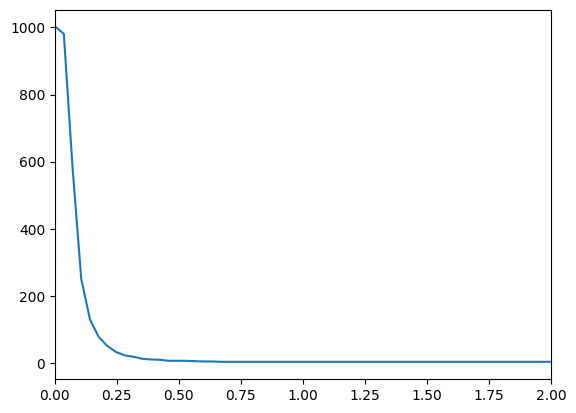

In [37]:
sns.lineplot(x=np.linspace(0.001,7,200),y=no_of_outliers)
plt.xlim(0,2)

Text(0, 0.5, 'Percent if y label classified as outliers')

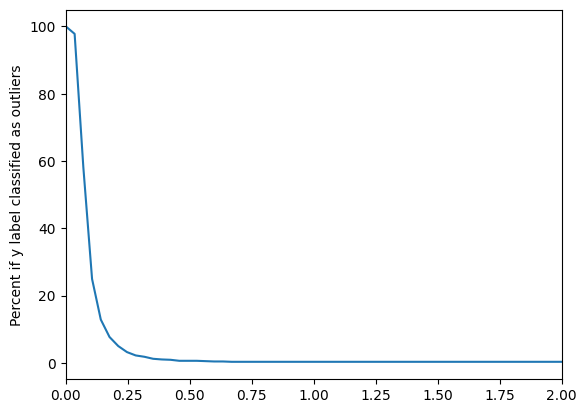

In [39]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.xlim(0,2)
plt.ylabel("Percent if y label classified as outliers")

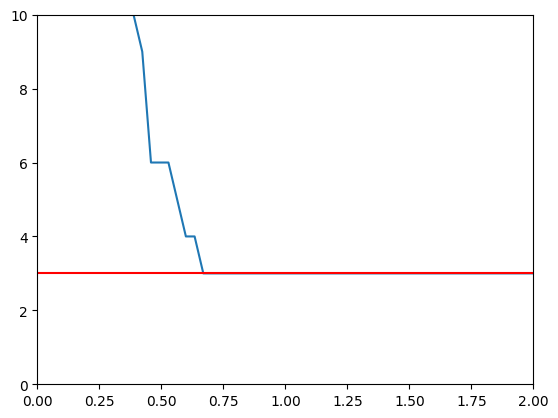

In [41]:
sns.lineplot(x=np.linspace(0.001,7,200),y=no_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

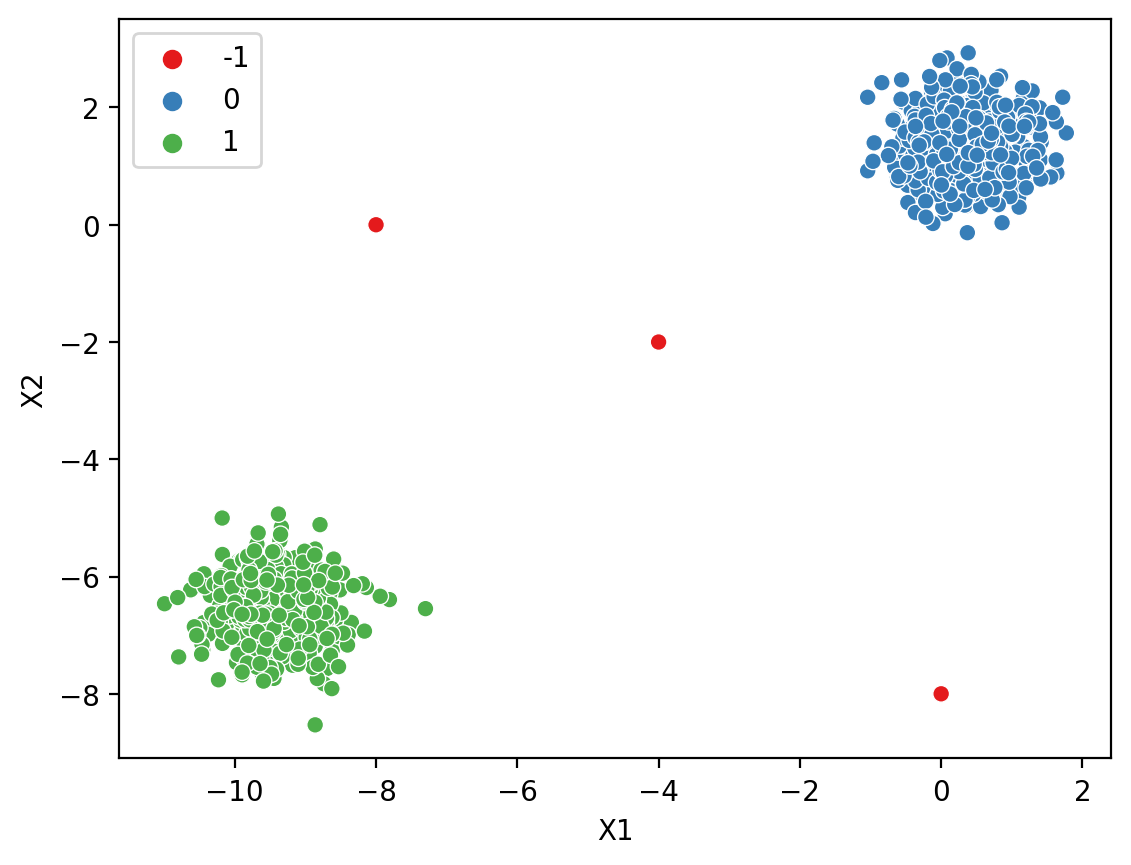

In [43]:
model = DBSCAN(eps=0.75)
display_categories(model,df_outliers)

In [44]:
outlier_percent = []
no_of_outliers = []
for n in np.arange(1,100):
    model = DBSCAN(min_samples=n)
    model.fit(df_outliers)
    no_of_outliers.append(np.sum(model.labels_==-1))
    percent = 100*np.sum(model.labels_==-1)/len(model.labels_)
    outlier_percent.append(percent)

Text(0, 0.5, 'Pct of of outlier ')

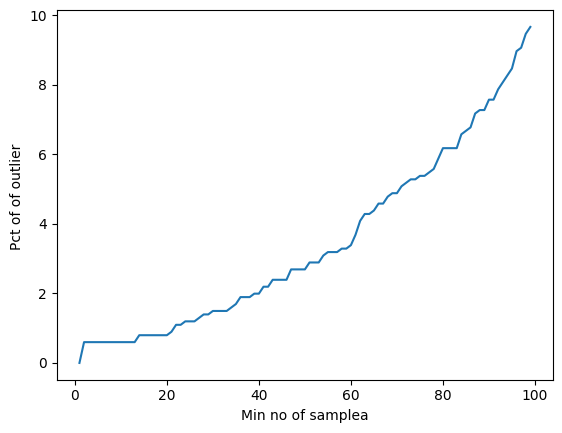

In [47]:
sns.lineplot(x = np.arange(1,100),y = outlier_percent)
plt.xlabel('Min no of samplea')
plt.ylabel('Pct of of outlier ')